# Mode identifier on theta-space

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [2]:
# Change as necessary
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
n_at = 6
THSPC_DIR = "theta"

In [3]:
th_min, th_max, ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
ntheta = int(ntheta)
KPT = 'M'
print(f"{ntheta} angles from {th_min} to {th_max}")

101 angles from 0.01 to 10.0


In [4]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
phonons = np.load(ppath)
nmodes = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

DMs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/dms.npy')
GM_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/GM_set.npy')
k_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/k_set.npy')
bl_M = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/masses.npy')
mesh = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mesh.npy')
print(f"Mesh shape: {mesh.shape}")
print(f"K-point: {KPT}")

Dataset shape: (101, 61, 1521, 3)
Number of modes: 61
Mesh shape: (101, 1521, 2)
K-point: M


In [5]:
SAVE = True

Analyzing theta = 7.003 (idx=70)


<Figure size 432x288 with 0 Axes>

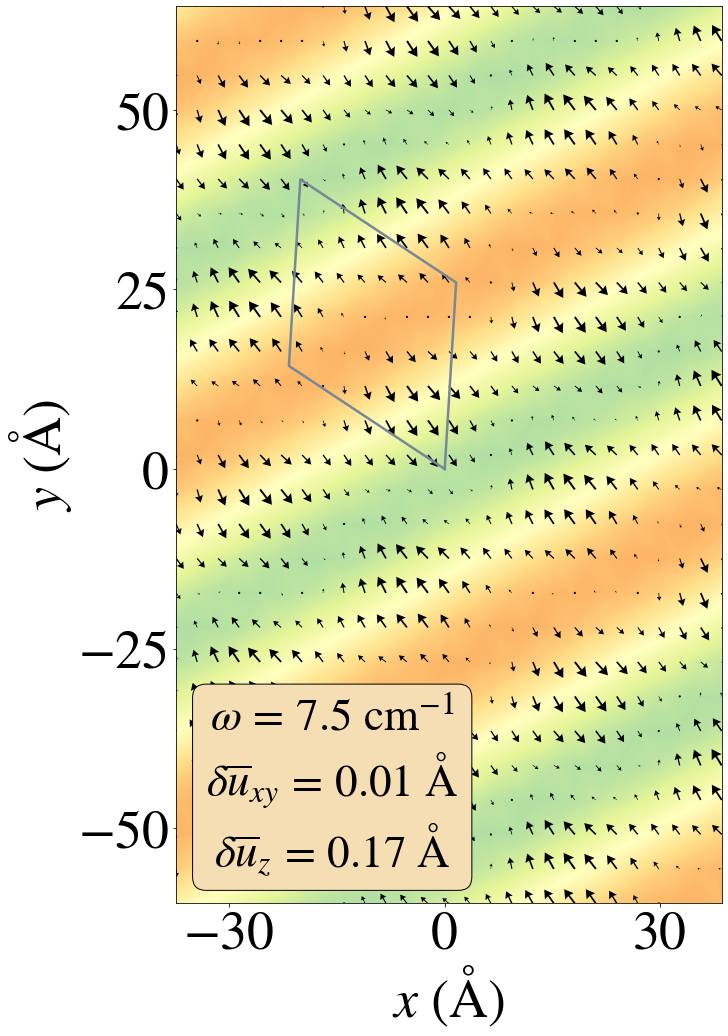

<Figure size 432x288 with 0 Axes>

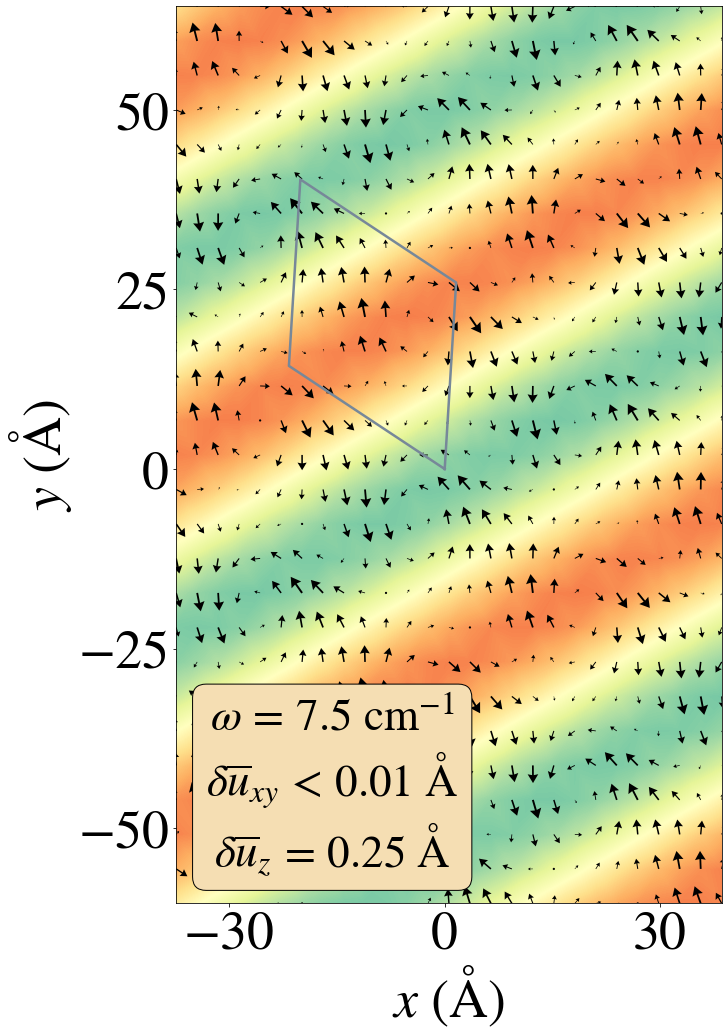

In [6]:
# Visualize the real-space phonons
THETA_IDX = 70
WHICH_MODE = 1
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=3,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE, outname='M.png', 
                 ticky=True, labely=True, labelx=True, reduce_tick=True)

Analyzing theta = 1.009 (idx=10)


<Figure size 432x288 with 0 Axes>

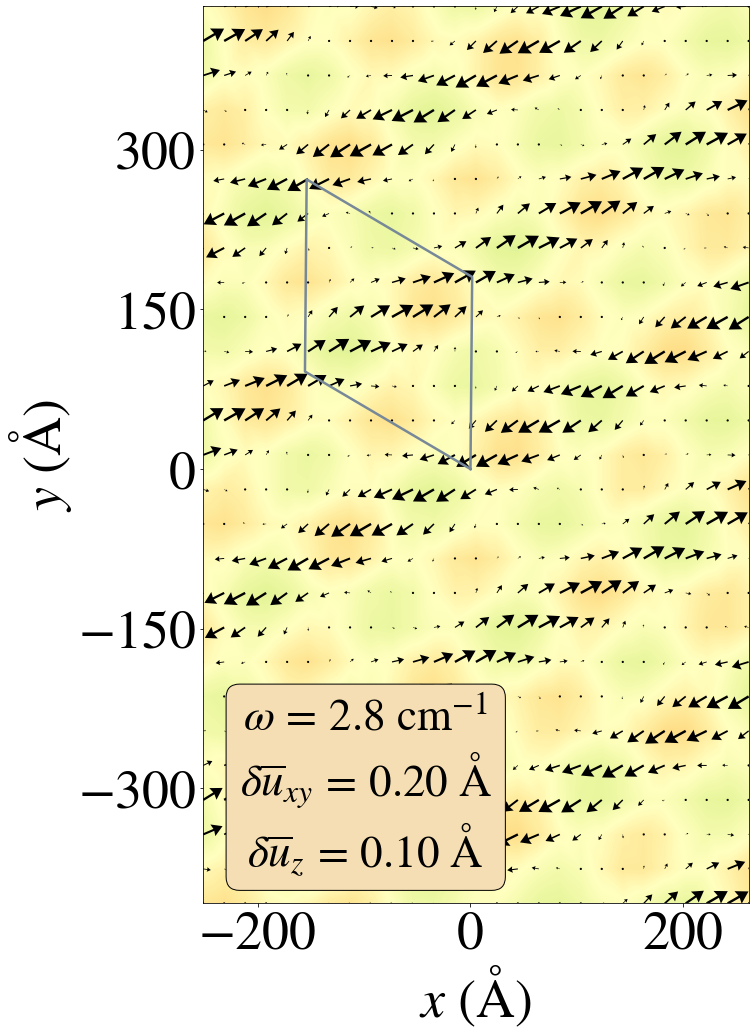

<Figure size 432x288 with 0 Axes>

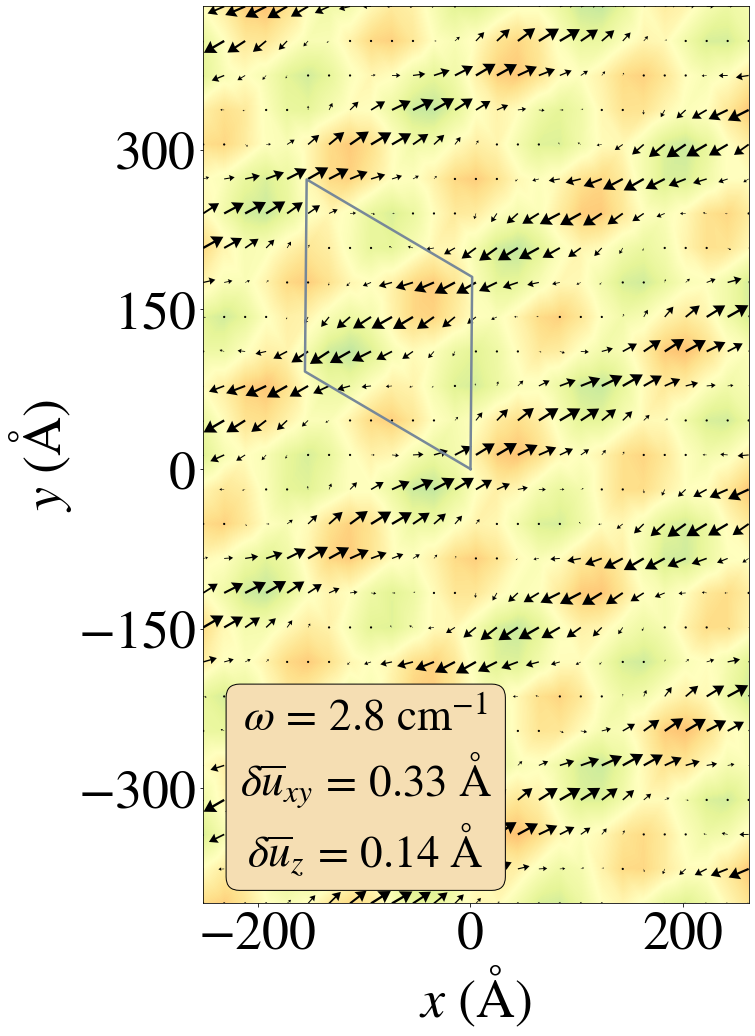

In [7]:
# Visualize the real-space phonons
THETA_IDX = 10
WHICH_MODE = 9
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=3,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE, outname='M.png', 
                 ticky=True, labely=True, labelx=True, reduce_tick=True)